In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def boundary(matrix, row, col): 
    if row < 0 or col < 0:
        return False
    if row > len(matrix)-1 or col > len(matrix)-1:
        return False
    return True

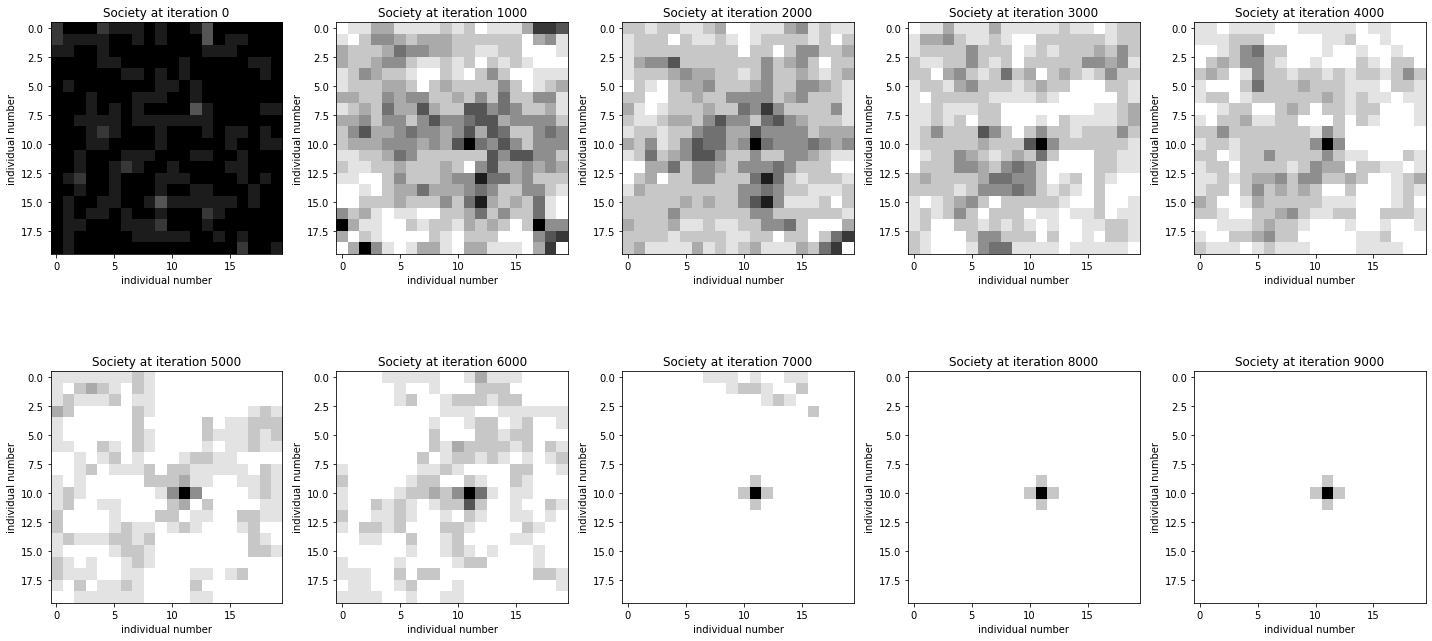

In [22]:
fig,axs = plt.subplots(nrows=2,ncols=5,figsize=(20,10))

opinions=[0,1,2,3,4,5,6,7,8,9] #available opinions for each trait
n=20 #we will create a society fo n^2 persons


individuals=np.reshape(np.random.choice(opinions,5*n**2,p=(1/len(opinions))*np.ones(len(opinions))),(n,n,5))
#create a society with n^2 individuals where each one of them has 5 traits

for k in range(10000): 
                       
                    

    N=max(1,int((n**2)*0.5)) #number of persons we will take to have the chance to interact.

    cam=np.linspace(0,n-1,n)
    P=(1/len(cam))*np.ones(len(cam))

    changes=np.reshape(np.random.choice(cam,2*N,p=P),(N,2))# we select the entries from the individuals who will have the chance to itneract

    for i in changes: 
        i=[int(i[0]),int(i[1])]
        a1=np.random.choice([-1,1],1,p=[0.5,0.5])[0] 
        al=np.random.uniform(0,1) 
        if al>0.5: #random selection of a neighbor
            a=[a1,0]
        if al<0.5: #random selection of a neighbor
            a=[0,a1] 
        if boundary(np.zeros((n,n)),i[0]+a[0],i[1]+a[1])==True: #if the neighbor is in the society
            u=np.sum(np.floor(1/(abs(individuals[i[0]+a[0],i[1]+a[1]]-individuals[i[0],i[1]])+1)))/len(individuals[0][0]) #calculate similarity between the selected person and its neighbor
            v=np.random.uniform(0,1)
            if v<u and u!=1: #if they interact
                b=[]
                for l in range(len(individuals[0][0])): #select the traits in which the selected person and its neighbor think different
                    if individuals[i[0]+a[0],i[1]+a[1],l]!=individuals[i[0],i[1],l]:
                        b.append(l)
                l=np.random.choice(b,1,p=(1/len(b))*np.ones(len(b)))[0] #randomly select one of the traits in which they disagree
                individuals[i[0],i[1],l]=individuals[i[0]+a[0],i[1]+a[1],l] #set the opinion of the person to the opinion of its neighbor on the selected trait


    if k/1000==int(k/1000): 
        K=np.zeros((len(individuals),len(individuals[0])))
        for i in range(len(individuals)):
            for j in range(len(individuals[0])):
                J=np.sum(np.floor(1/(abs(individuals-individuals[i,j])+1)),axis=2)/len(individuals[0][0]) #calculate the similarity between the person [i,j] and the rest of hte society and store it in the matrix J
                summing=[]
                neighbors=[[0,1],[1,0],[0,-1],[-1,0]] #potential negihbors
                for v in neighbors:
                    if boundary(J,i+v[0],j+v[1])==True:
                        summing.append(v) #select the actual neighbors
                ent=0
                for v in summing:
                    ent+=J[i+v[0],j+v[1]] #sums the similarity whitin the neighbors
                K[i,j]=np.round(ent/len(summing),1) #the matrix K stores the rounded similarities between the person [i,j] and its negihbors


        dct = {0: 0., 0.1:1, 0.2: 2., 0.3: 3., 0.4: 4.,0.5:5.,0.6:6.,0.7:7.,0.8:8.,0.9:9.,1:10} #selected colors for the graph
        m = [[dct[i] for i in j] for j in K]


        axs[k//5000,(k%5000)//1000].imshow(m, cmap='gray', vmin=1, vmax=10) #select the tipe of graph
        axs[k//5000,(k%5000)//1000].set_title(f'Society at iteration {k}')
        axs[k//5000,(k%5000)//1000].set_xlabel('individual number')
        axs[k//5000,(k%5000)//1000].set_ylabel('individual number')
        
plt.tight_layout()
plt.show()